In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load the cryptocurrencies data
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df.set_index('Unnamed: 0', inplace=True)
# crypto_df = crypto_df.reset_index(drop=True, inplace=True)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000


### Data Pre-Processing

In [3]:
# Only keep the cryptos that are trading
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [4]:
# Drop the "IsTrading" column
crypto_df = crypto_df.drop(columns='IsTrading')
crypto_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [5]:
# Remove all rows that have at least one null value
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [6]:
# Removing all the rows that have no coins being mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [7]:
# Deleting CoinName from the dataframe
crypto_df = crypto_df.drop(columns='CoinName', axis=1)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [8]:
crypto_df.index.names = ['']
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [9]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [10]:
crypto_df['ProofType'].nunique()

25

In [11]:
# Convert to numerical Algorithm and ProofType
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize the data
X_scaled = StandardScaler().fit_transform(X[['TotalCoinsMined','TotalCoinSupply']])
X_scaled

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [13]:
X_scaled_df=X.copy()
X_scaled_df['TotalCoinsMined']=X_scaled[:,0]
X_scaled_df['TotalCoinSupply']=X_scaled[:,1]

### Perform Dimensionality Reduction with PCA

In [14]:
X_scaled_df.shape

(532, 98)

In [15]:
# Applying PCA to reduce dimensions to 3
# then initializing the PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(X_scaled_df)

In [16]:
crypto_pca.shape

(532, 12)

In [17]:
pca.explained_variance_ratio_.sum()

0.9048889000766702

In [18]:
# Transform PCA data to a DataFrame
crypto_pcs_df = pd.DataFrame(
    data=crypto_pca, index=X.index
)
crypto_pcs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
,,,,,,,,,,,,
42,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
404,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
1337,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
BTC,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
ETH,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333


### Reduce PCA Dataset Dimensions with t-SNE

In [19]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [20]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pcs_df)

In [21]:
tsne_features.shape

(532, 2)

In [22]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pcs_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pcs_df['y'] = tsne_features[:,1]

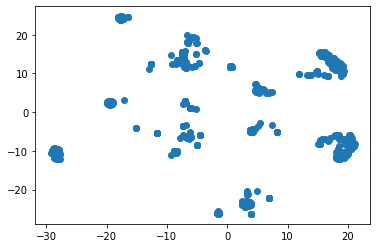

In [23]:
# Visualize the clusters
plt.scatter(crypto_pcs_df['x'], crypto_pcs_df['y'])
plt.show()

### Cluster Analysis with k-Means

In [24]:
# Initializing model with K = 3 
model = KMeans(n_clusters=4, random_state=0)

In [25]:
# Fitting model
model.fit(crypto_pcs_df.loc[:,0:11])

KMeans(n_clusters=4, random_state=0)

In [26]:
predictions = model.predict(crypto_pcs_df.loc[:,0:11])
print(predictions)

[2 2 2 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 2 2 0
 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 2 0 2 2 2 0 0 0 2 2 2 2 2 0
 0 0 2 2 0 2 0 2 2 0 0 0 0 2 2 0 2 0 0 2 2 0 2 2 0 0 2 2 0 2 2 0 2 0 2 0 2
 0 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 2 0 2 0 2 2 0 0 2 0 0 2
 2 0 2 0 2 2 2 0 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 0
 2 2 0 2 0 2 0 2 0 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 2 0 2 2 0 2 0 0 2 0 0 2 0 2 2 2 0 2 2 0
 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 0 2 0 0 0 0 2 0 2 2 0 2 0 0 0 2 0 2 0 0 0
 2 0 2 0 2 2 2 0 2 0 0 0 0 0 2 2 0 2 2 2 0 2 0 2 0 2 0 2 2 2 2 0 2 2 0 2 2
 2 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 0 2 0 0 0 2 0 0 2 2 2 0 0 0 2 2 2
 3 0 2 0 0 0 0 2 2 2 0 0 0 2 2 2 2 2 2 0 0 0 0 2 2 2 0 2 0 2 2 2 2 0 2 2 0
 2 2 0 0 2 0 2 0 0 0 0 2 2 0 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 0 2 0 0 0 0
 2 2 2 2 0 2 2 0 2 2 0 2 0 2 0 0 2 2 0 2 0 0 2 0 0 2 0 2 0 2 2 0 2 2 2 2 2
 0 0 0 2 2 2 0 2 0 2 0 2 

In [27]:
# Add a new class column to df_iris
crypto_pcs_df["class"] = model.labels_
crypto_pcs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,x,y,class
,,,,,,,,,,,,,,,
42,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789,18.369698,-12.193692,2
404,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888,18.245827,-5.992611,2
1337,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220,4.631949,5.607427,2
BTC,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461,-18.020185,24.590639,0
ETH,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333,-6.305214,18.586706,0


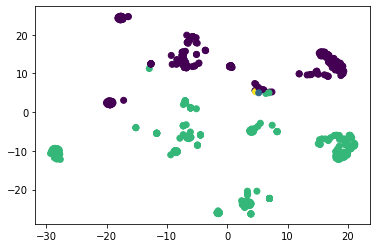

In [28]:
# Visualize the clusters
plt.scatter(crypto_pcs_df['x'], crypto_pcs_df['y'],c=model.labels_)
plt.show()

### Best Value for k Using the Elbow Curve¶


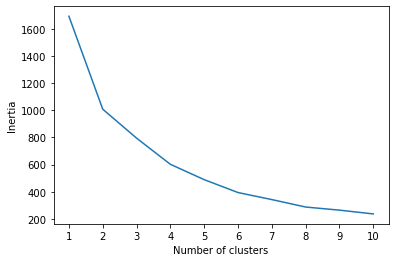

In [29]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pcs_df.loc[:,0:11])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Kmeans with the optimum k

In [30]:
# Initializing model with K = 3 
model = KMeans(n_clusters=5, random_state=0)

In [31]:
# Fitting model
model.fit(crypto_pcs_df.loc[:,0:11])

KMeans(n_clusters=5, random_state=0)

In [32]:
model.labels_

array([0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 3, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 0,
       2, 2, 2, 2, 2, 0, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 3, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 3, 2, 3, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 3, 3, 2, 0, 0, 2, 3, 2, 0, 2,
       3, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 0,
       2, 3, 2, 2, 3, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       3, 2, 2, 2, 2, 0, 3, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0,
       3, 2, 3, 3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0,
       2, 3, 3, 0, 3, 0, 2, 2, 3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0,
       3, 0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 3,
       0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 0, 0, 0, 2, 3, 0, 2, 3, 0, 0, 0, 0,
       3, 0, 2, 3, 2, 3, 0, 0, 3, 2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 3, 2, 0, 2, 0,

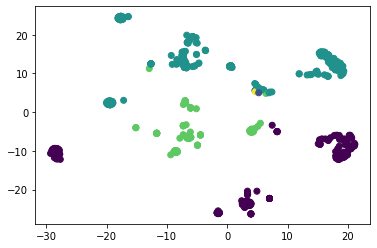

In [33]:
plt.scatter(crypto_pcs_df['x'], crypto_pcs_df['y'],c=model.labels_)
plt.show()

In [34]:
from collections import Counter
Counter(model.labels_)

Counter({0: 183, 2: 237, 3: 110, 4: 1, 1: 1})

### Recommendations - Based on Analysis of Cryptocurrencies

#### The cryptocurrencies are able to be grouped into 5 clusters. It also appears that for cluster labels 0, 2 and 3, this group makes up 99% of all the cryptocurrencies that are trading, being mined and have supply. And based on the scatter plot below it appears to be evenly clustered and visible to the naked eye. These specific cryptocurrencies contained in these clusters would be suitable for a financial consultancy to create a investment portfolio that would be able to be marketed to new and existing clients.